In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

curr = Path.cwd() 
path = curr.parent.parent
file = str(path)
file+="/data_cleanup/cleaned_data.csv"
print(file)

/Users/dzanijaivan/Developer/hotel_occupancy/lumen/data_cleanup/cleaned_data.csv


In [2]:
df = pd.read_csv(file)
df.head()

,Unnamed: 0,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,broj_nocenja,ukupno_placeno
0,0,0,2015-07-01,2015-01-21,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152,1.0,100.000000
1,1,0,2015-07-01,2015-06-10,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906,1.0,100.000000
2,2,0,2015-07-01,2015-05-13,2015-07-02,NaN,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896,1.0,64.991345
3,3,0,2015-07-01,2014-05-30,2015-07-02,NaN,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245,1.0,74.368897
4,4,0,2015-07-01,2014-07-06,2015-07-03,NaN,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703,2.0,261.946557


In [5]:
df = df[df["status_rezervacije"] == "Check-Out"]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 74414 entries, 0 to 93961
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     74414 non-null  int64  
 1   hotel_id                       74414 non-null  int64  
 2   datum_dolaska                  74414 non-null  object 
 3   datum_kreiranja_rezervacije    74414 non-null  object 
 4   datum_odjave                   74414 non-null  object 
 5   datum_otkazivanja_rezervacije  0 non-null      object 
 6   broj_odraslih_gostiju          74414 non-null  int64  
 7   broj_djece_gostiju             74414 non-null  float64
 8   zemlja_gosta                   74414 non-null  object 
 9   kanal_prodaje_id               74414 non-null  int64  
 10  tip_sobe_id                    74414 non-null  int64  
 11  cijena_nocenja                 74414 non-null  float64
 12  status_rezervacije             74414 non-null  obje

,Unnamed: 0,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,broj_nocenja,ukupno_placeno
0,0,0,2015-07-01,2015-01-21,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152,1.0,100.000000
1,1,0,2015-07-01,2015-06-10,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906,1.0,100.000000
2,2,0,2015-07-01,2015-05-13,2015-07-02,NaN,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896,1.0,64.991345
3,3,0,2015-07-01,2014-05-30,2015-07-02,NaN,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245,1.0,74.368897
4,4,0,2015-07-01,2014-07-06,2015-07-03,NaN,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703,2.0,261.946557


In [6]:
df['datum_dolaska'] = pd.to_datetime(df['datum_dolaska'])
df['datum_kreiranja_rezervacije'] = pd.to_datetime(df['datum_kreiranja_rezervacije'])
df['datum_otkazivanja_rezervacije'] = pd.to_datetime(df['datum_otkazivanja_rezervacije'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74414 entries, 0 to 93961
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     74414 non-null  int64         
 1   hotel_id                       74414 non-null  int64         
 2   datum_dolaska                  74414 non-null  datetime64[ns]
 3   datum_kreiranja_rezervacije    74414 non-null  datetime64[ns]
 4   datum_odjave                   74414 non-null  object        
 5   datum_otkazivanja_rezervacije  0 non-null      datetime64[ns]
 6   broj_odraslih_gostiju          74414 non-null  int64         
 7   broj_djece_gostiju             74414 non-null  float64       
 8   zemlja_gosta                   74414 non-null  object        
 9   kanal_prodaje_id               74414 non-null  int64         
 10  tip_sobe_id                    74414 non-null  int64         
 11  cijena_nocenja      

In [8]:
df['ukupan_broj_gostiju'] = df['broj_odraslih_gostiju'] + df['broj_djece_gostiju']
occupancy = df[(df['datum_otkazivanja_rezervacije'].isna())]
occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])
#print(occupancy)

# Za svaku rezervaciju generiranje svih datuma boravka
dates = []
for index, row in occupancy.iterrows():
    delta = (row['datum_odjave'] - row['datum_dolaska']).days
    for i in range(delta):
        dates.append((row['datum_dolaska'] + pd.Timedelta(days=i), row['ukupan_broj_gostiju']))

# Pretvaranje u DataFrame
dates_df = pd.DataFrame(dates, columns=['datum', 'broj_gostiju'])

# Grupiranje po datumu i sumiranje broja gostiju
final_df = dates_df.groupby('datum')['broj_gostiju'].sum().reset_index()
final_df.head()

       Unnamed: 0  hotel_id datum_dolaska datum_kreiranja_rezervacije  \
0               0         0    2015-07-01                  2015-01-21   
1               1         0    2015-07-01                  2015-06-10   
2               2         0    2015-07-01                  2015-05-13   
3               3         0    2015-07-01                  2014-05-30   
4               4         0    2015-07-01                  2014-07-06   
...           ...       ...           ...                         ...   
93957      119205         1    2017-08-30                  2017-04-01   
93958      119206         1    2017-08-31                  2017-05-06   
93959      119207         1    2017-08-31                  2017-01-23   
93960      119208         1    2017-08-31                  2017-03-21   
93961      119209         1    2017-10-29                  2017-06-19   

      datum_odjave datum_otkazivanja_rezervacije  broj_odraslih_gostiju  \
0       2015-07-01                           NaT

,datum,broj_gostiju
0,2015-01-01,10.0
1,2015-01-02,16.0
2,2015-01-03,19.0
3,2015-01-04,24.0
4,2015-01-05,25.0


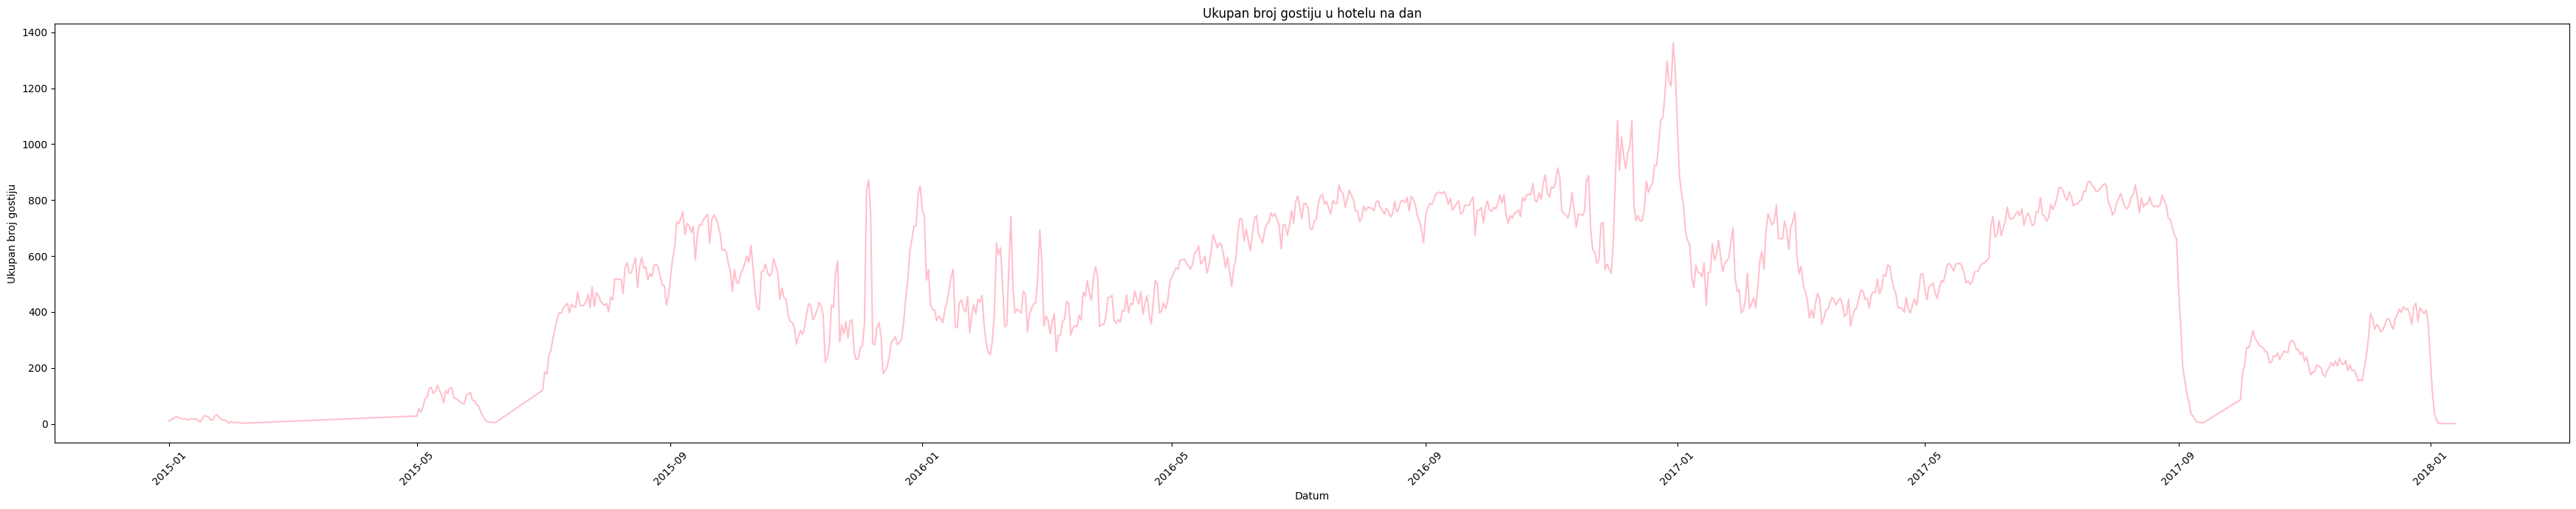

In [7]:
plt.figure(figsize=(35, 7))  # Prilagodite veličinu prema potrebi
plt.plot(final_df['datum'], final_df['broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju u hotelu na dan')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()

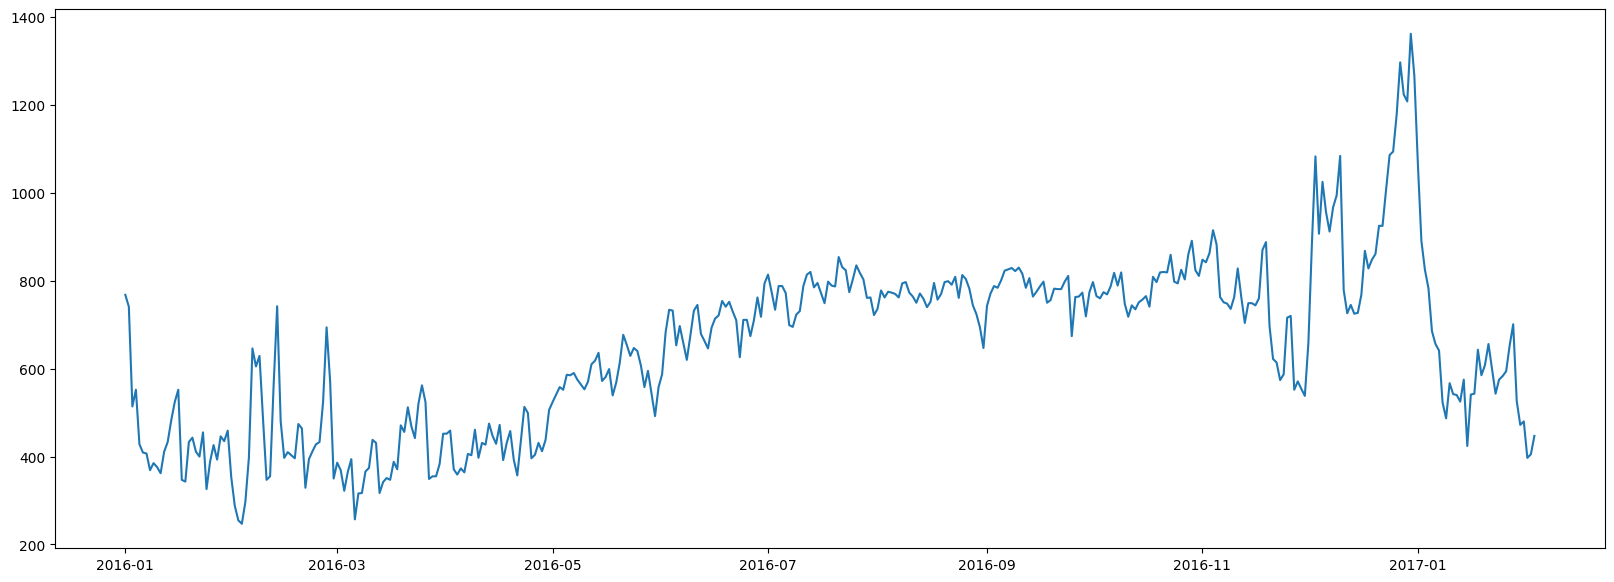

In [8]:
train = final_df[(final_df["datum"] >= datetime(2016,1,1)) &  (final_df["datum"] <= datetime(2017,2,3))]
train.head()
plt.figure(figsize=(20, 7))
plt.plot(train["datum"],train["broj_gostiju"])

         datum  broj_gostiju
686 2017-03-03         500.0
687 2017-03-04         472.0
688 2017-03-05         444.0
689 2017-03-06         378.0
690 2017-03-07         407.0


Text(0.5, 1.0, 'test')

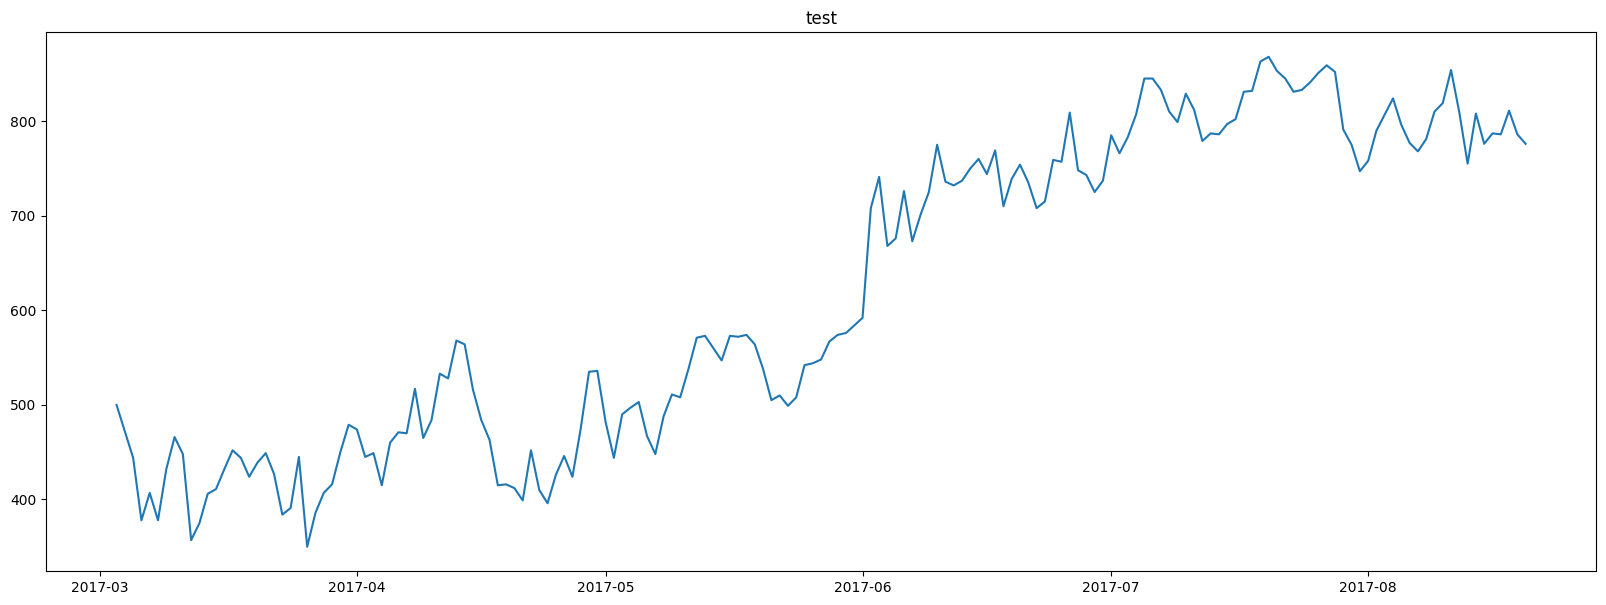

In [21]:
test = final_df[(final_df["datum"] >= datetime(2017,3,3)) &  (final_df["datum"] <= datetime(2017,8,20))]
print(test.head())
plt.figure(figsize=(20, 7))
plt.plot(test["datum"],test["broj_gostiju"])
plt.title("test")

                datum  broj_gostiju
datum                              
2015-08-30 2015-08-30         425.0
2015-08-31 2015-08-31         457.0
2015-09-01 2015-09-01         523.0
2015-09-02 2015-09-02         590.0
2015-09-03 2015-09-03         629.0


Text(0.5, 1.0, 'DF2')

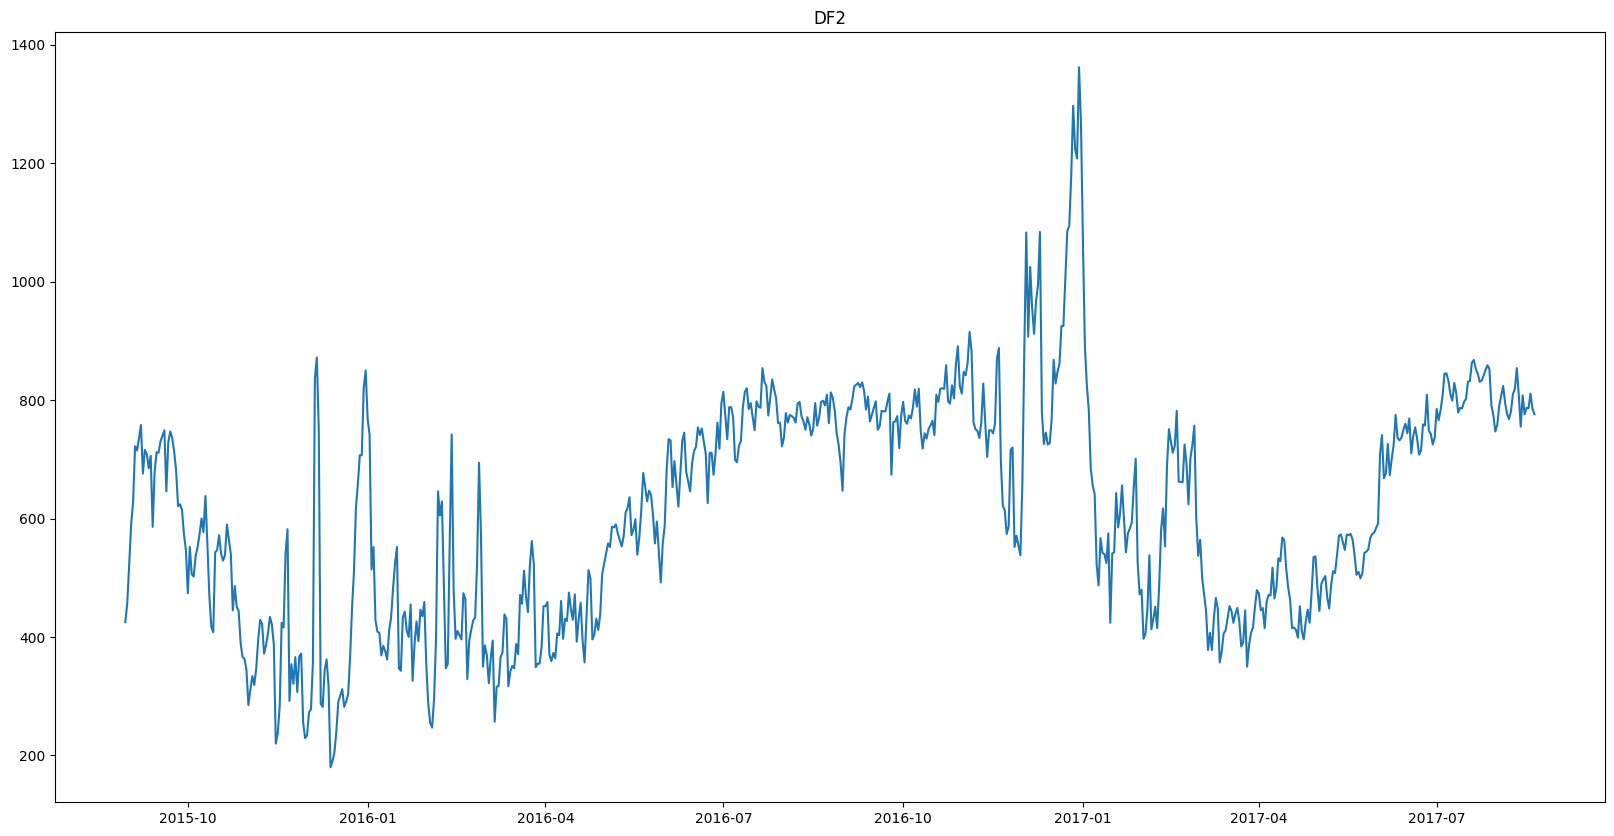

In [20]:
from pmdarima import auto_arima
df2 = final_df[(final_df["datum"] >= datetime(2015,8,30)) &  (final_df["datum"] <= datetime(2017,8,20))]
df2.index = df2["datum"]
print(df2.head())
plt.figure(figsize = (20,10))
plt.plot(df2["datum"], df2["broj_gostiju"])
plt.title("DF2")

In [30]:
from statsmodels.tsa.arima.model import ARIMA
train2 = df2.iloc[:-30]
test2 = df2.iloc[-30:]
print(train2.shape)
print(test2.shape)

(692, 2)
(30, 2)


Text(0.5, 1.0, 'test2')

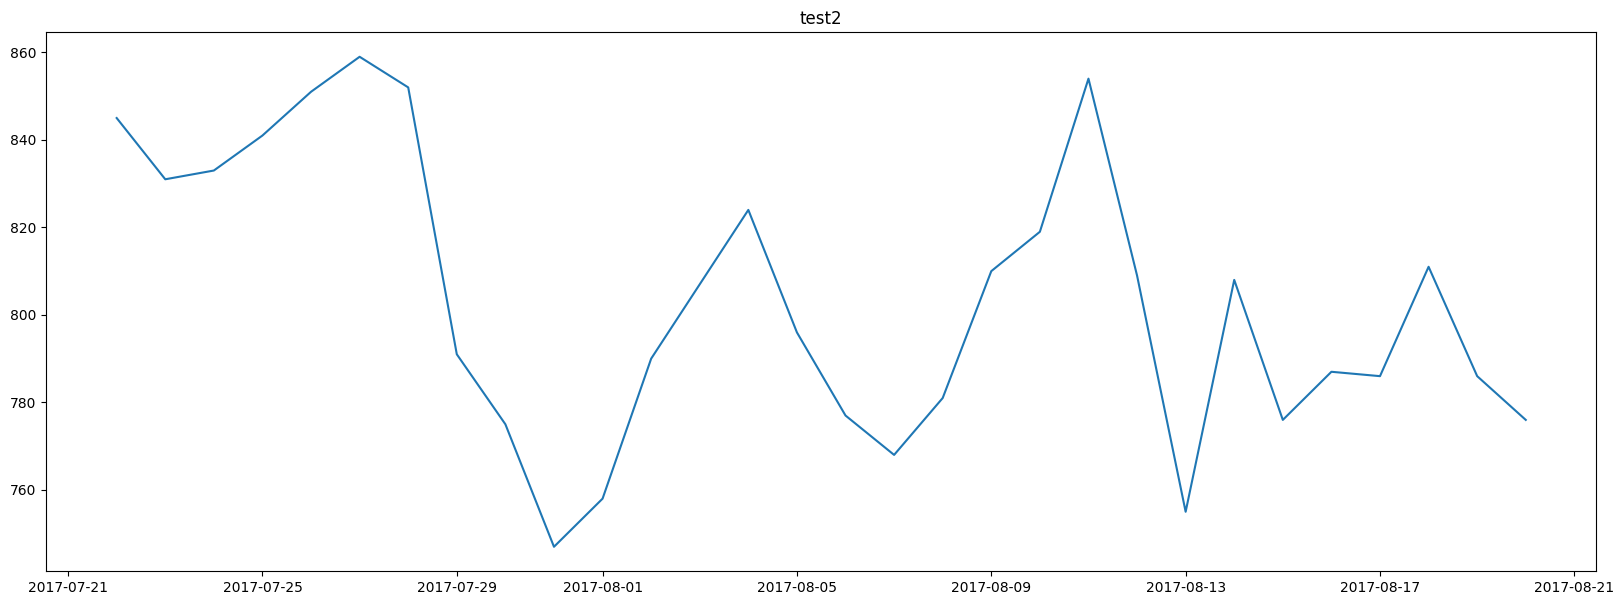

In [23]:
plt.figure(figsize=(20, 7))
plt.plot(test2["datum"],test2["broj_gostiju"])
plt.title("test2")

            broj_gostiju
datum                   
2015-08-30         425.0
2015-08-31         457.0
2015-09-01         523.0
2015-09-02         590.0
2015-09-03         629.0
...                  ...
2017-07-17         831.0
2017-07-18         832.0
2017-07-19         863.0
2017-07-20         868.0
2017-07-21         853.0

[692 rows x 1 columns]


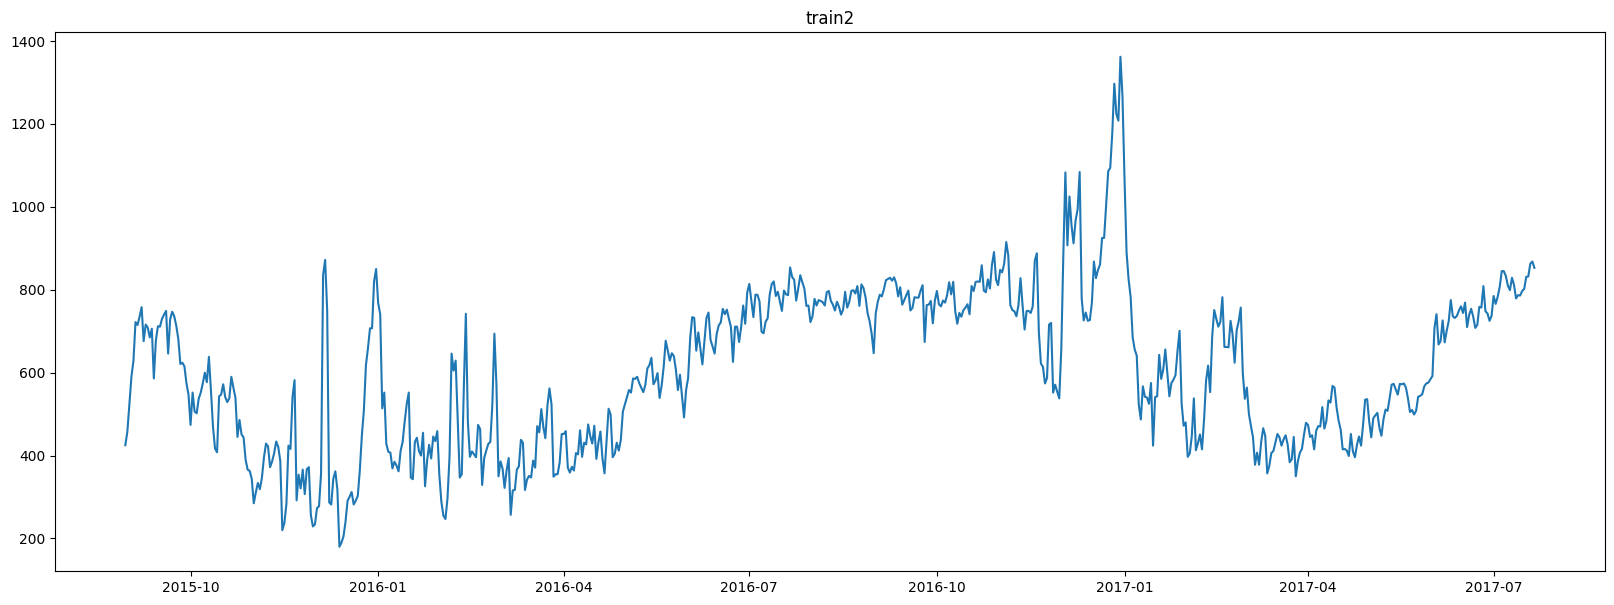

In [33]:
plt.figure(figsize=(20, 7))
plt.plot(train2["datum"],train2["broj_gostiju"])
plt.title("train2")
del train2["datum"]
print(train2)


            broj_gostiju
datum                   
2015-08-31          32.0
2015-09-01          66.0
2015-09-02          67.0
2015-09-03          39.0
2015-09-04          93.0
...                  ...
2017-07-17          29.0
2017-07-18           1.0
2017-07-19          31.0
2017-07-20           5.0
2017-07-21         -15.0

[691 rows x 1 columns]


Text(0.5, 1.0, 'train2 diff')

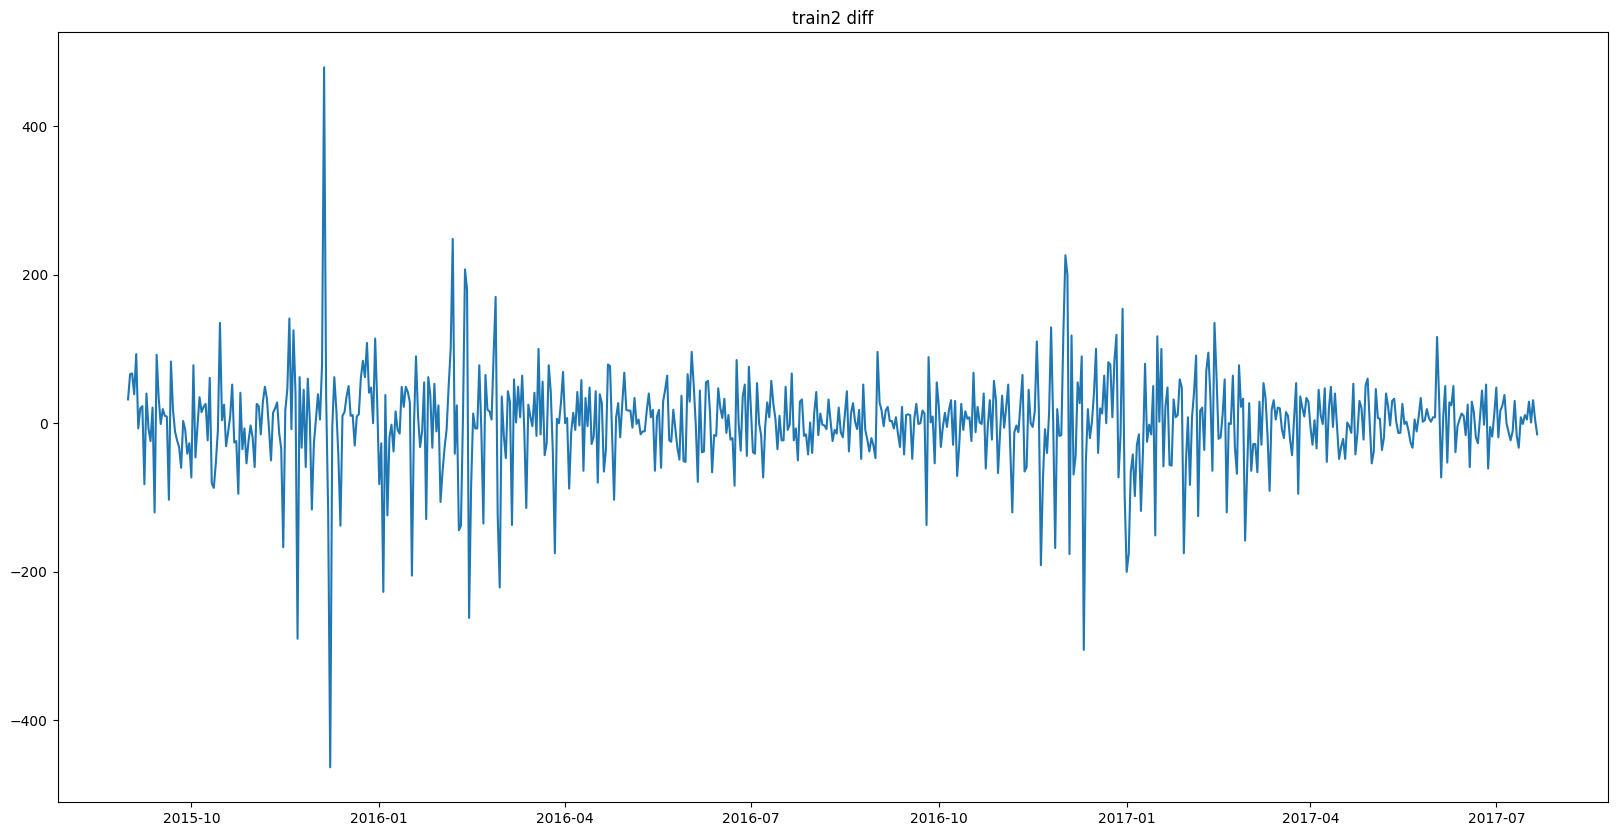

In [35]:
train2diff = train2.diff().dropna()
print(train2diff)
plt.figure(figsize = (20,10))
plt.plot(train2diff.index, train2diff["broj_gostiju"])
plt.title("train2 diff")

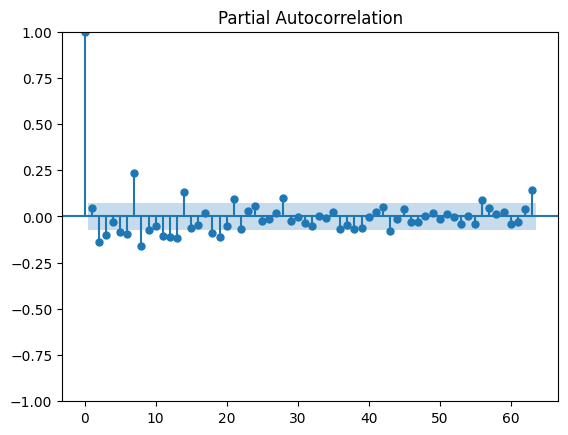

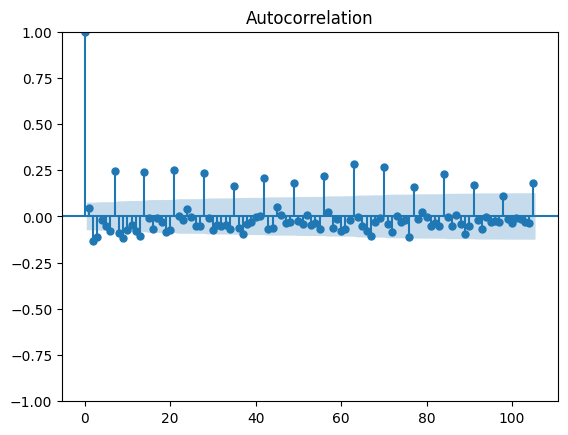

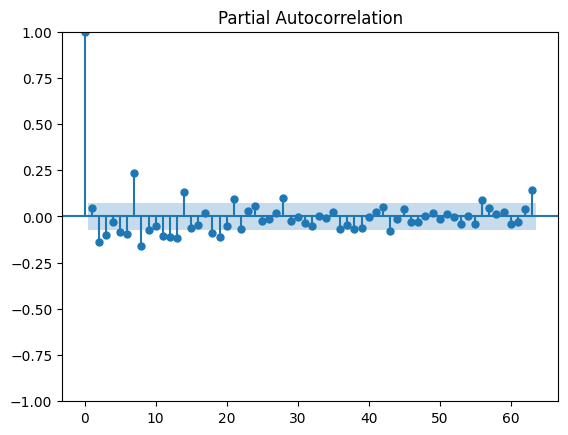

In [97]:
plot_acf(train2diff["broj_gostiju"], lags=105)
plot_pacf(train2diff["broj_gostiju"], lags=63)

In [42]:
model = auto_arima(train2diff["broj_gostiju"],seasonal = False, trace = True)
model.summary()

Performing stepwise search to minimize aic
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=7696.599, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7727.127, Time=0.01 sec
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7727.809, Time=0.02 sec
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
 ARIMA(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  691
Model:               SARIMAX(1, 0, 2)   Log Likelihood               -3843.318
Date:                Thu, 07 Mar 2024   AIC                           7694.637
Time:                        11:24:10   BIC                           7712.789
Sample:                    08-31-2015   HQIC                          7701.658
                         - 07-21-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7732      0.034     22.455      0.000       0.706       0.841
ma.L1         -0.7673      0.049    -15.754      0.000      -0.863      -0.672
ma.L2         -0.1583      0.036     -4.451      0.000      -0.228      -0.089
sigma2      3965.8303    107.795     36.791      0.000    3754.556    4177.104
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2028.22
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
mod = ARIMA(train2diff['broj_gostiju'], order = (105,0,63))
mod = mod.fit()
mod.summary()

/opt/anaconda3/envs/dataSci/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dataSci/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dataSci/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

691 720
DatetimeIndex(['2015-08-30', '2015-08-31', '2015-09-01', '2015-09-02',
               '2015-09-03', '2015-09-04', '2015-09-05', '2015-09-06',
               '2015-09-07', '2015-09-08',
               ...
               '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14',
               '2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-19', '2017-08-20'],
              dtype='datetime64[ns]', name='datum', length=722, freq=None)
2017-07-22   -11.724277
2017-07-23    -9.860407
2017-07-24    27.098907
2017-07-25    -9.895701
2017-07-26     2.007443
2017-07-27   -13.172285
2017-07-28   -12.726879
2017-07-29    23.405870
2017-07-30   -17.435149
2017-07-31    18.162338
2017-08-01     4.941149
2017-08-02   -22.733838
2017-08-03    -5.179022
2017-08-04    18.261780
2017-08-05     6.215187
2017-08-06   -15.175588
2017-08-07    20.888728
2017-08-08   -24.010802
2017-08-09    -3.056953
2017-08-10     5.218018
2017-08-11    -2.265232
2017-08-12    19.663116

<Axes: >

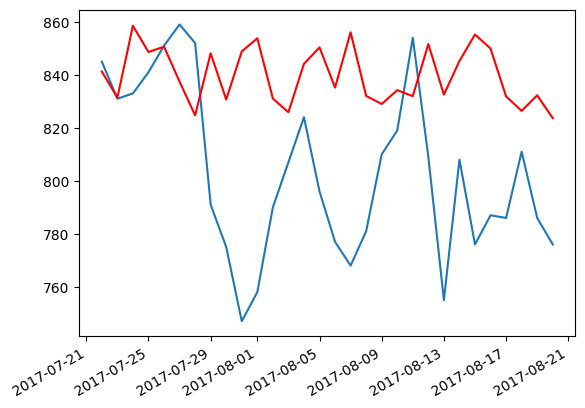

In [79]:
start = len(train2diff)
end = len(test2) + len(train2diff) - 1
 
print(start,end)
pred = mod.predict(start = start, end = end)

print(df2.index)
print(pred)
pred = train2["broj_gostiju"].iloc[-1] + np.cumsum(pred)
#plt.plot(pred["datum"],legend=True)
plt.plot(test2.index, test2["broj_gostiju"])
pred.plot(color = "red")